# Exploring Zomato Bangalore Data

# Introduction

Bangalore's dining scene has significantly changed over the years, making it known for its diverse culinary landscape. Leading restaurant discovery site Zomato has had a significant impact on how people in the city experience food. The Zomato Bangalore dataset is the subject of this Python project's in-depth exploratory data analysis( EDA).

To gain insightful knowledge about Bangalore's food culture, the dataset will be cleaned and analyzed using Python. This project shows how effective EDA is at identifying patterns, trends, and intriguing data observations.


![Zomato Banner](https://brandmusiq.com/assets/work_banner_vyEql_Zomato.jpg)

# Data Description

* name - name of the restaurant
* online_order - online ordering is available or not
* book_table - table booking option available or not
* rate - average rating of the restaurants out of 5
* votes - contains total number of votes for the restaurant
* location - location of the restaurant
* rest_type - restaurant type
* cuisines - cuisines (comma seperated)
* approx_cost(for two people) - contains the approximate cost of meal for two people
* listed_in(type) - type of meal
* listed_in(city) - contains the neighborhood in which the restaurant is located


In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv") #Reading the file

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Data Cleaning

In [6]:
#Dropping Unnecessary columns
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)  
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.isnull().sum()  #Checking Null Values

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
df.duplicated().sum() #Checking duplicates

108

In [9]:
df.drop_duplicates(inplace = True) #Dropping Duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [10]:
df['rate'].unique() #checking what kind of data needs to be cleaned

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
#Creating a function to clean rate

def clean_rate(x) :
    if x== "NEW" or x == "-":
        return np.nan
    else:
        s = str(x).replace("/5","")
        return float(s)
    

In [12]:
df['rate'] = df['rate'].apply(clean_rate) #Cleaning the rate column


In [13]:
df['approx_cost(for two people)'].unique() 
#This values are comma separated values 

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(",","") 
#Replacing comma

In [15]:
df.dropna(inplace = True) 
#Dropping null values

In [16]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype("int") 
#Changing the Datatype to Integer for aggregation

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Data Visualization

# Univariate Analysis

Univariate analysis focuses on understanding individual variables without considering their relationships with other variables.

# Distribution of Restaurant Ratings

The histogram presents an insightful view of the distribution of restaurant ratings within the dataset. Ratings are typically measured on a scale of 1 to 5, with 5 being the highest.

Text(0, 0.5, 'Count')

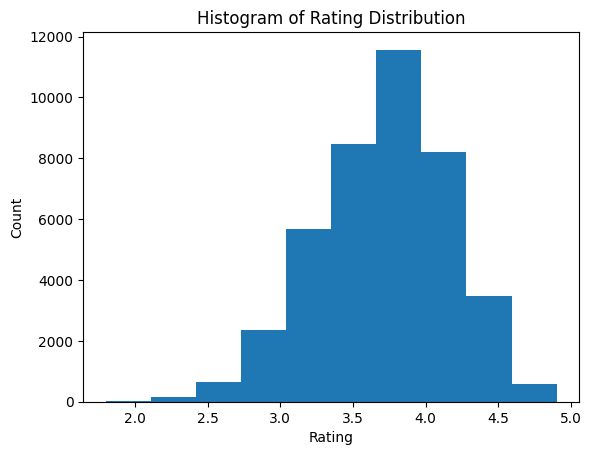

In [18]:
plt.hist(x= "rate", data = df)
plt.title("Histogram of Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

**Observations:**

The histogram showcases a bell-shaped curve, with the peak of the distribution centered around an approximate rating range of 3.6 to 3.8. This central peak signifies that a significant proportion of the dataset consists of restaurants with ratings falling within this moderately positive range.

# Availability of Table Booking

Based on the availability of table booking options, the bar chart shows how restaurants are distributed in the dataset. There are two categories represented: "Yes" and "No."


Text(0, 0.5, 'Number of Restaurants')

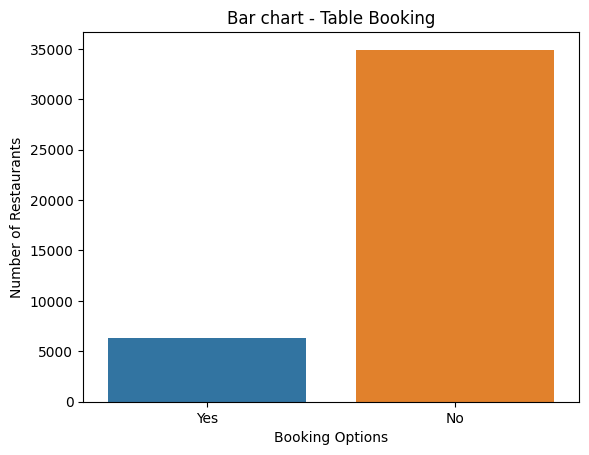

In [19]:
sns.countplot(data = df, x = "book_table")
plt.title("Bar chart - Table Booking")
plt.xlabel("Booking Options")
plt.ylabel("Number of Restaurants")

**Observations:**

* The "No" category, which includes the biggest bar, indicates that the majority of restaurants in the dataset do not offer table reservations.

* The "Yes" category represents the convenience of table booking, in contrast, which is offered by a smaller number of restaurants.

* The prevalence of table booking services among the restaurants in the dataset is revealed by this chart, which emphasizes that many of them do not provide this service.

# Availability of Online Ordering

Based on the availability of online ordering options, the bar chart shows how restaurants are distributed in the dataset. There are two categories represented: "Yes" and "No."


Text(0, 0.5, 'Number of Restaurants')

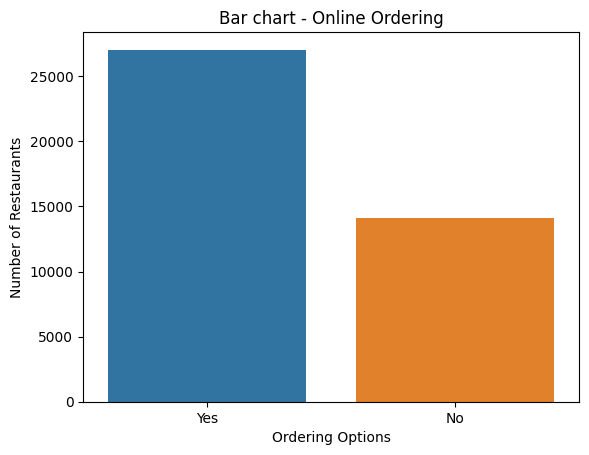

In [20]:
sns.countplot(data = df, x = "online_order")
plt.title("Bar chart - Online Ordering")
plt.xlabel("Ordering Options")
plt.ylabel("Number of Restaurants")

**Important Observations:**

* The majority of restaurants offer online ordering.
* A smaller proportion (compared to yes) do not provide this service.

# Top 10 Restaurant Types

In [21]:
top = df["rest_type"].value_counts()
topresttype = top[0:10].to_frame()
topresttype.reset_index(inplace = True)
topresttype

,rest_type,count
0,Quick Bites,13861
1,Casual Dining,9597
2,Cafe,3365
3,Dessert Parlor,1848
4,Delivery,1666
5,"Takeaway, Delivery",1276
6,"Casual Dining, Bar",1087
7,Bakery,704
8,Bar,640
9,Beverage Shop,638


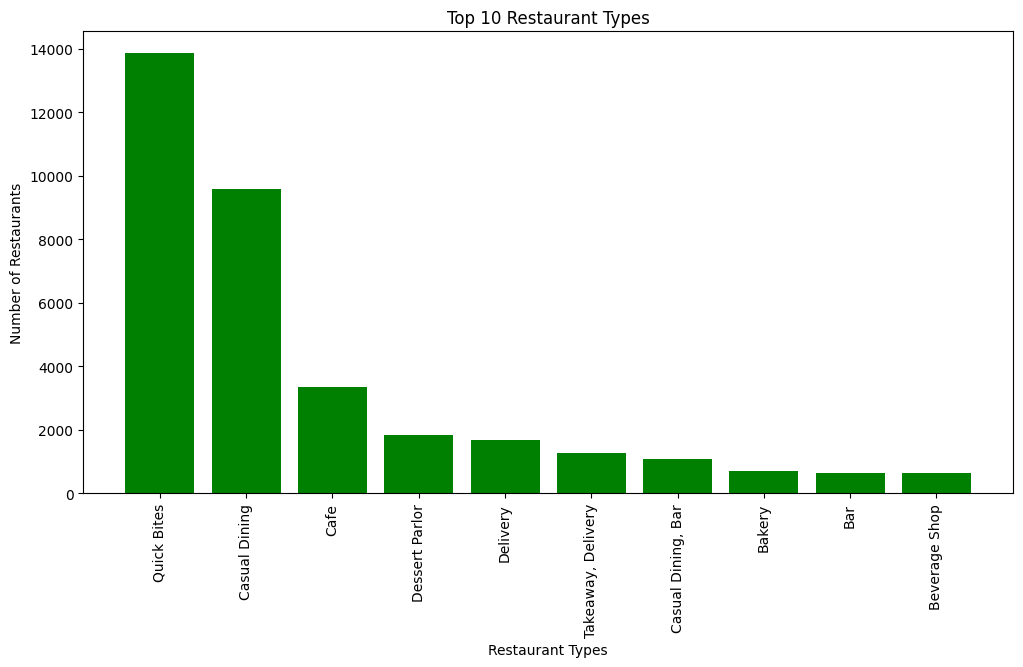

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(x= "rest_type", height = "count", data = topresttype,color = "green")
plt.title("Top 10 Restaurant Types")
plt.xlabel("Restaurant Types")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation = "vertical")
plt.show()

**Important Observations:**

* Quick Bites is the most common restaurant type.
* Casual Dining and Cafe follow closely.
* The list also includes Dessert Parlor, Delivery, and Takeaway, Delivery.
* Casual Dining, Bar, Bakery, Bar, and Beverage Shop complete the top 10.

# Locations and Number of Restaurants

In [23]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

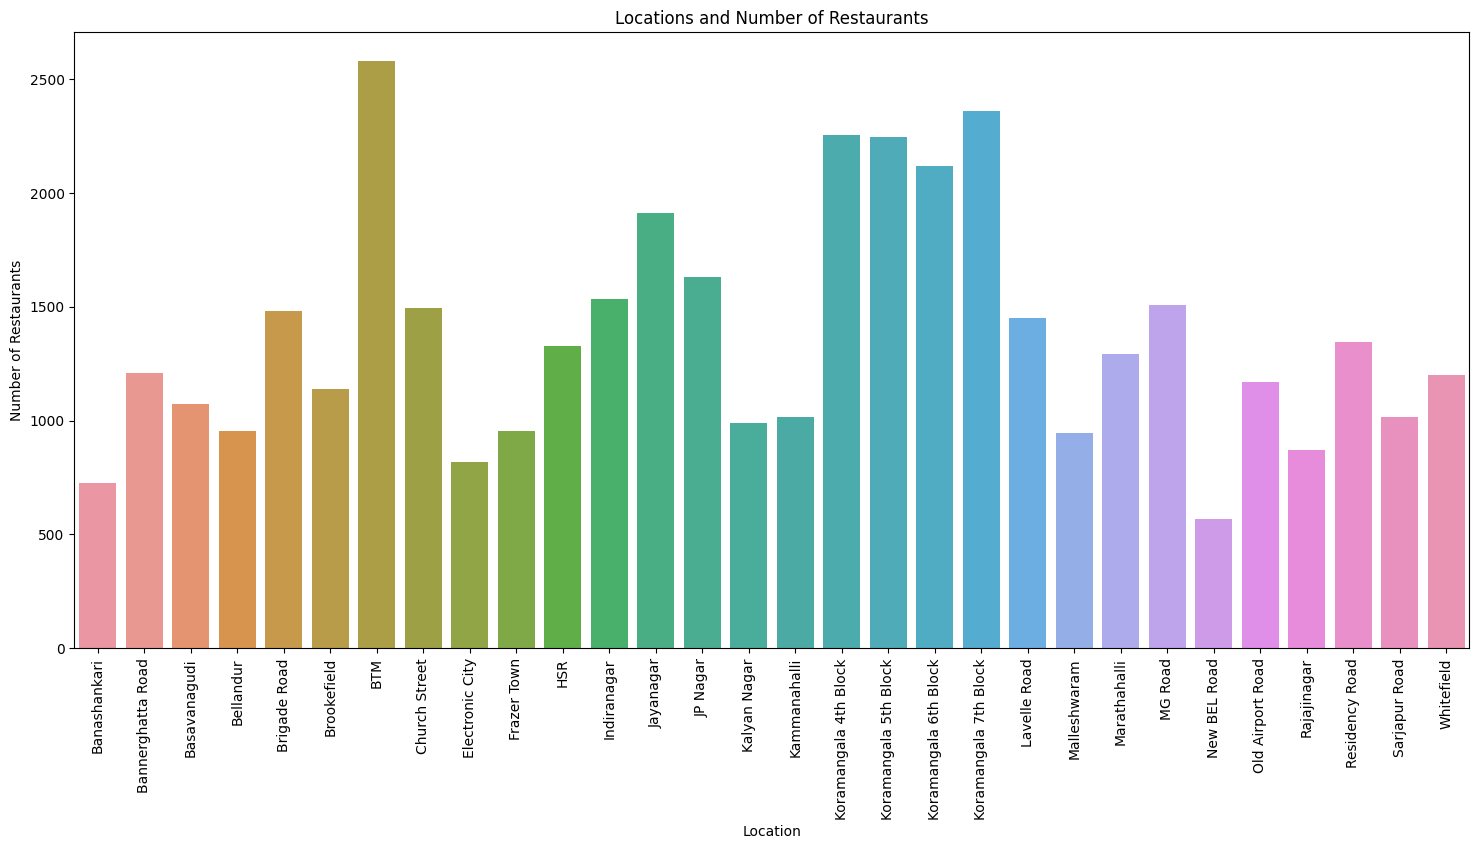

In [25]:
plt.figure(figsize=(18, 8))
axes = sns.countplot(x="listed_in(city)", data = df)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
plt.title("Locations and Number of Restaurants")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.show()

**Observations**

Based on the dataset, it was observed that Koramangala (4th, 5th, 6th, and 7th blocks combined) has the highest number of restaurants in Bangalore, while BTM area has the second highest number of restaurants. 

# Average cost for two people distribution

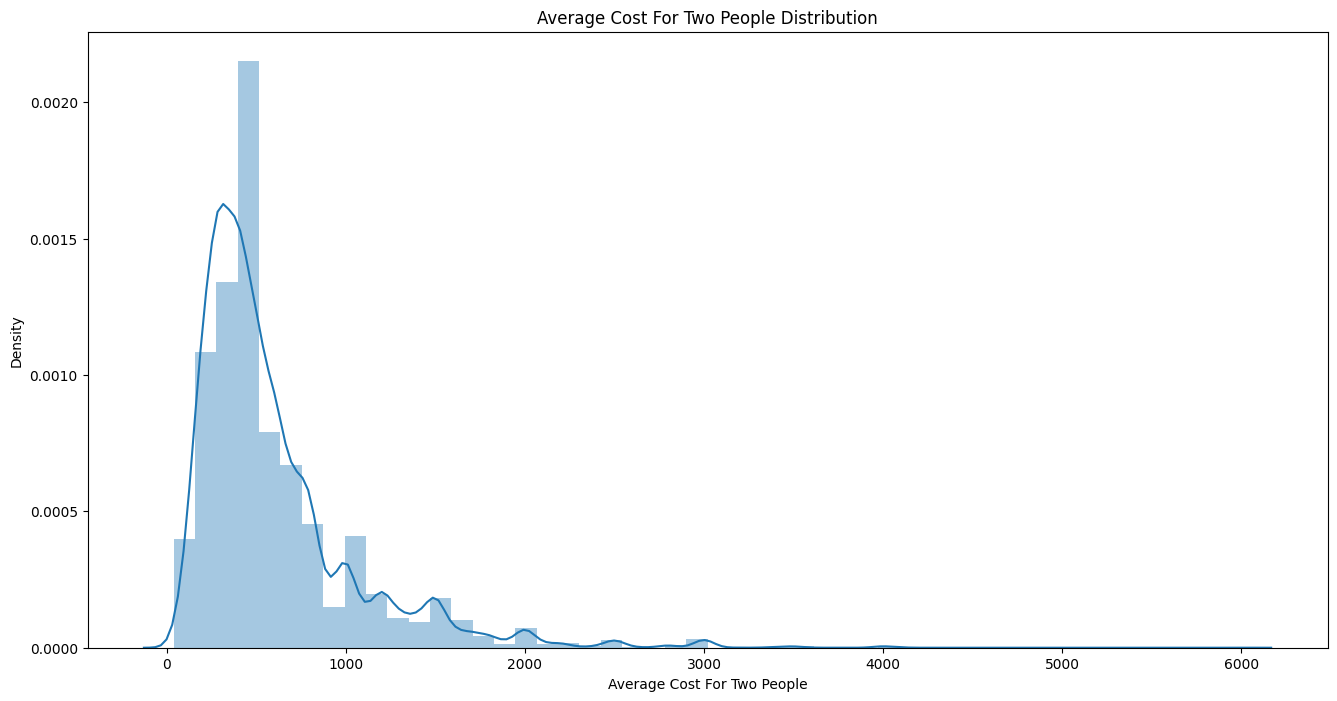

In [26]:
plt.figure(figsize=(16, 8))
sns.distplot(df['approx_cost(for two people)'])
plt.title("Average Cost For Two People Distribution")
plt.xlabel("Average Cost For Two People")
plt.show()

**Observation**

It can be observed that the majority of restaurants fall within the 0 to 1000 rupees category

# Restaurant Chain With The Highest Number Of Locations

In [27]:
restchain = df['name'].value_counts().to_frame().sort_values(by = "count", ascending = False).reset_index()[0:10]
restchain

,name,count
0,Cafe Coffee Day,86
1,Onesta,85
2,Empire Restaurant,69
3,Kanti Sweets,68
4,Five Star Chicken,68
5,Just Bake,67
6,Baskin Robbins,62
7,Petoo,60
8,KFC,60
9,Pizza Hut,60


In [28]:
fig0 =  px.bar(restchain, x= "name", y= "count", title = "Bar chart - Top Restaurants", color = "name",height = 800, width = 1000)
fig0.update_layout(xaxis_title='Restaurant Name', yaxis_title='Number of Restaurants')
fig0.show()

**Observations**

 Cafe coffee day has highest number of location

# Top 10 Cuisines

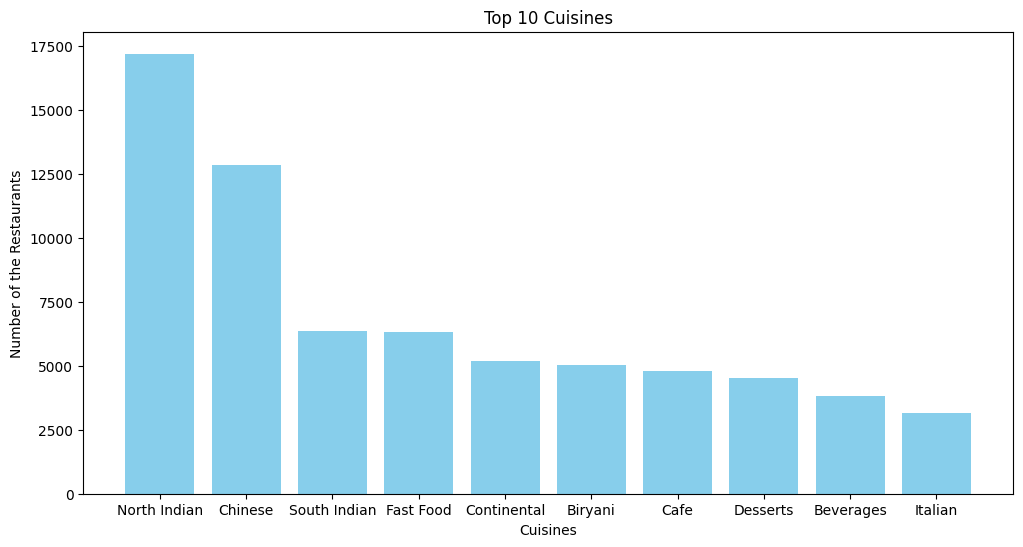

In [29]:
cuisines_count = df['cuisines'].str.split(', ', expand=True).stack().value_counts().to_frame().reset_index()  #splitting the cuisines by comma

top_cuisines = cuisines_count.head(10) #Top 10 Cuisines

plt.figure(figsize=(12, 6))
plt.bar(data = top_cuisines, x= "index", height= "count", color='skyblue')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Number of the Restaurants')
plt.show()

**Observations**

According to the top 10 chart, North Indian and Chinese are the two most popular cuisines. There is also a sizable presence of South Indian and fast food. The rest is made up of beverages and Italian, with Continental, Biryani, Cafe, and Desserts being popular. The various food options in the dataset are clearly depicted in this snapshot.

# Bivariate Analysis & Multivariate Analysis

Bivariate Analysis explores relationships between two variables,
while Multivariate Analysis examines interactions among three or more variables,
providing a comprehensive understanding of complex patterns in data


# Rating vs. Average Cost For Two Scatter Plot

This scatter plot illustrates the relationship between restaurant ratings and the average cost for two people

In [30]:
fig = px.scatter(df, x= "rate", y = "approx_cost(for two people)", color= "rate", height = 800, width = 1000, title = "Scatter plot Rating vs. Average Cost For Two")
fig.update_layout(xaxis_title='Rating', yaxis_title='Average Cost for Two People')
fig.show()

**Observations**

After analyzing the scatter plot of restaurant ratings and average cost for two people, it was found that restaurants with a cost of more than 2000 rupees have a rating of 3.5 or higher, with only a few exceptions. This suggests that there is a positive relationship between the average cost of a meal for two people and the restaurant's rating. In other words, more expensive restaurants tend to have higher ratings, likely due to factors such as higher quality ingredients and better service

# Distribution of Ratings by Restaurant Type


In [31]:
fig1 = px.box(df, x='listed_in(type)', y='rate', title='Box Plot: Distribution of Ratings by Restaurant Type', color = 'listed_in(type)')
fig1.update_layout(xaxis_title='Restaurant Type', yaxis_title='Rating')
fig1.show()

**Observations**

* Pubs and bars, Drinks & nightlife and Buffet type restaurant majority of the rating lies between 3.8 to 4.3 
* Cafes service generally have ratings between 2.3 and 4.7 majority of the rating lies between 3.7 to 4.3
* Delivery service generally have ratings between 2 and 4.9 majority of the rating lies between 3.4 to 3.9
* Desserts places usually get ratings from 2.4 to 4.9, with the middle range being 3.5 to 4.1.
* Dineout spots maintain ratings from 1.8 to 4.9, with the central range between 3.4 and 4.
* Drinks and Nightlife, Pubs and Bars cover a wider spectrum from 2 to 4.9, with the core ratings between 3.8 and 4.3.
* Out of these 7 restaurant types Pubs and bars, Drinks & nightlife and Buffet have good overall rating


# Relationship Among Rating, Approx Cost Of Two People and Votes

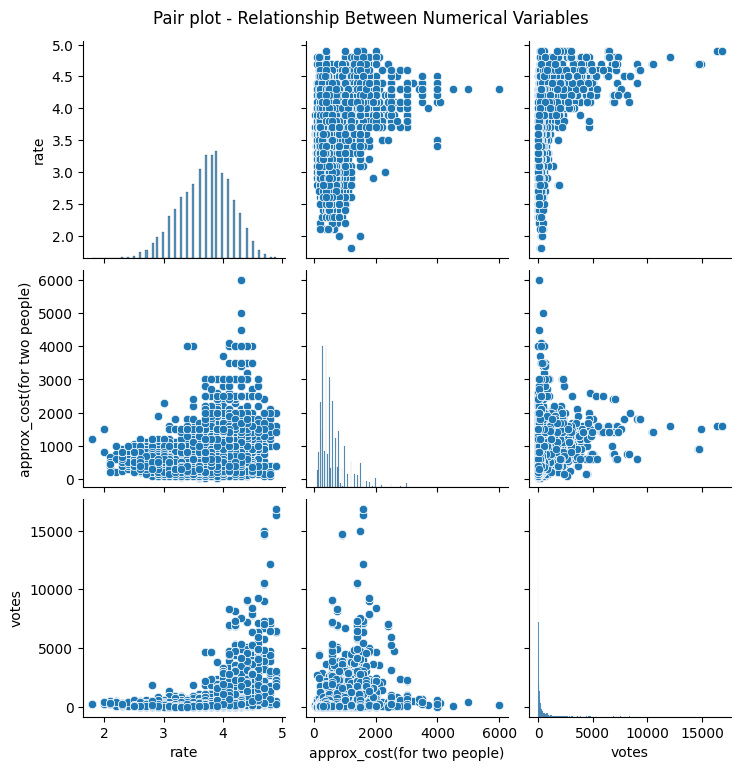

In [32]:
num_clmns = ['rate', 'approx_cost(for two people)', 'votes']

sns.pairplot(df[num_clmns])
plt.suptitle('Pair plot - Relationship Between Numerical Variables', y=1.02)
plt.show()

**Observations**

* **Votes Distribution:** About 75% of the places get votes below 277, mostly in the lower range.
* **Rating and Votes:** There's a positive link between higher ratings and more votes. People seem more likely to vote when they've had a good experience.
* **Cost and Votes:** Places with a cost for two between 0 to 1000 often gather more votes, ranging from 0 to 5000. This suggests that more affordable places tend to get more votes

# Distribution of Ratings by Location

In [33]:
fig = px.violin(df, x='listed_in(city)', y='rate', color = 'listed_in(city)',
                title='Violin Plot- Distribution of Ratings by Location')
fig.update_layout(xaxis_title='Location', yaxis_title='Rating')
fig.show()

**Observations**

**Majority of the ratings**

* **3.5 - 4.2** - Mg road
* **3.5 - 4.1** - Koramangala all blocks, Brigade road, Church street, Lavelle road, Residency road.
* **3.4 - 4.1** - Indra Nagar, BTM
* **3.4 - 4** - Frazer town, Jayanagar, Malleswaram, Old Airport road, Rajaji nagar


# Relationship Between Cuisines and Ratings

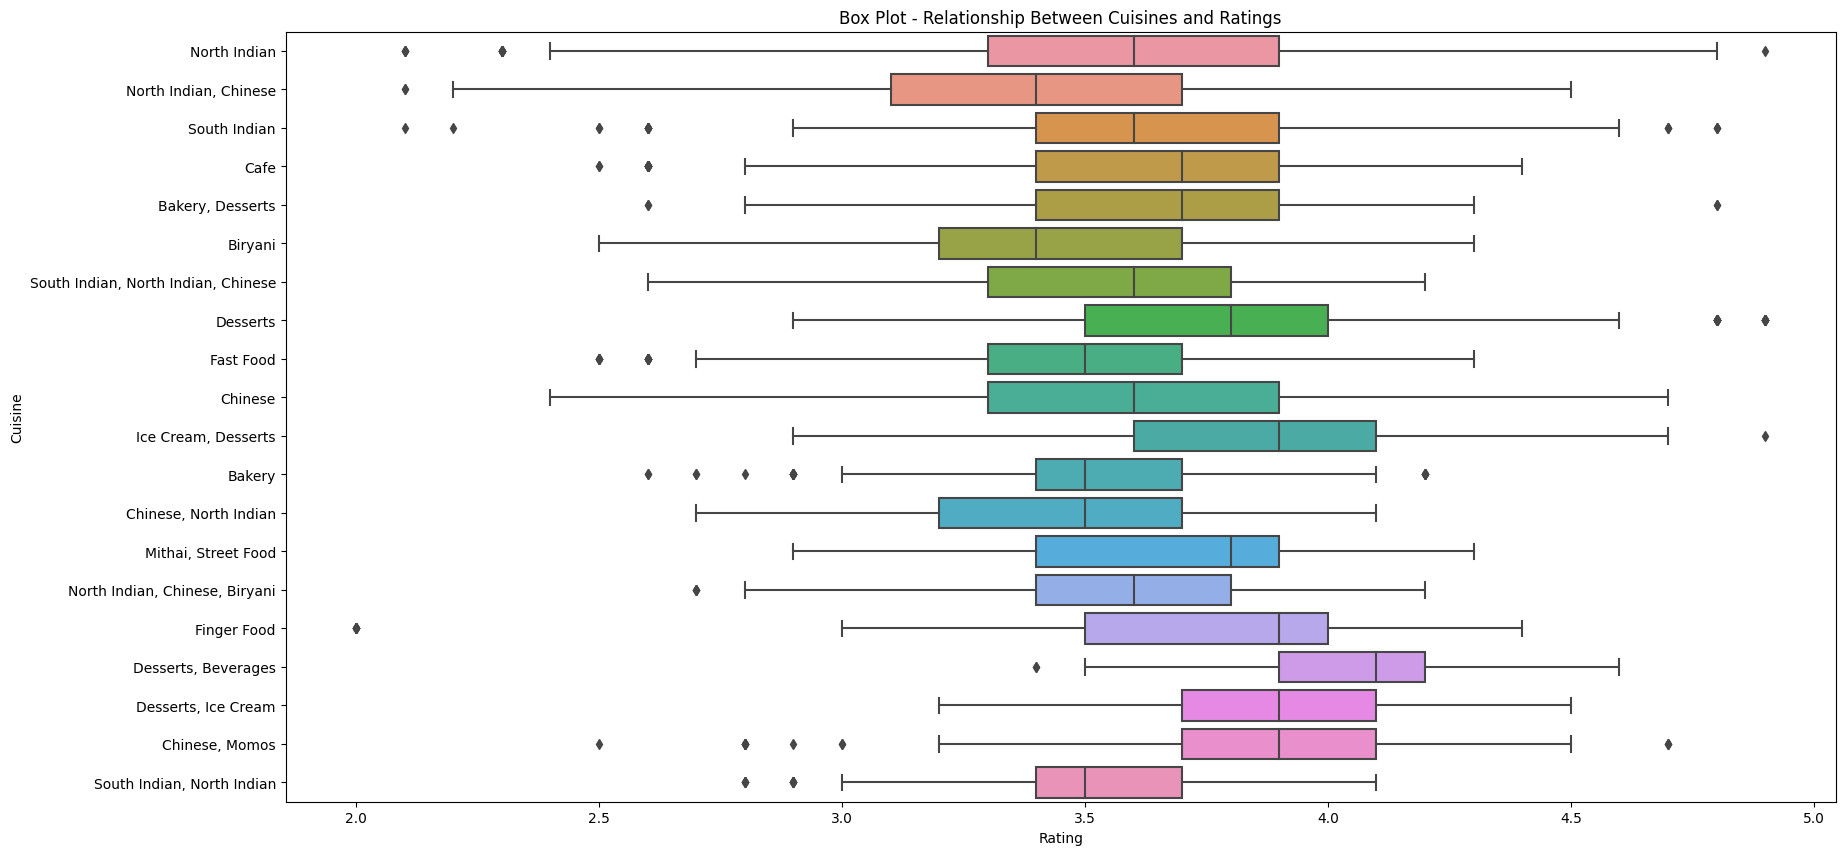

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='rate', y='cuisines', data=df, order=df['cuisines'].value_counts().index[:20])
plt.title('Box Plot - Relationship Between Cuisines and Ratings')
plt.xlabel('Rating')
plt.ylabel('Cuisine')
plt.show()

**Observations**

**Rating Distribution:** The majority of ratings across different cuisines are concentrated between 3 to 4, indicating that customers generally provide ratings in this moderate to high range.

**Popular Choices:** Desserts, Ice Cream, and Beverages cuisines seem to be particularly well-received, suggesting that customers have a strong preference for sweet treats and drinks.

**North Indian Cuisine:** Restaurants serving North Indian cuisine exhibit a broad distribution of ratings, indicating varied customer experiences. This might be due to the diverse nature of North Indian dishes.

**Chinese and Momos Combination:** Establishments offering both Chinese and Momos dishes show a positive trend in the majority rating distribution. 


# Conclusions

**Customer Ratings:** The majority of restaurants in Bangalore receive ratings between 3 to 4, indicating a generally positive sentiment among customers. This aligns with the central tendency observed in the histogram, revealing a bell- shaped curve.

**Table Booking and Online Ordering:** While the majority of restaurants offer online ordering options, a sizable portion of them do not offer table booking services. This suggests a move away from traditional reservations and toward convenience in the form of online ordering.

**Top Restaurant Types:** Quick Bites, Casual Dining, and Cafes are the most prevalent restaurant types in Bangalore.

**Location Analysis:** Koramangala emerges as a hotspot with the highest number of restaurants, followed by the BTM area. 

**Cuisine Preferences:** North Indian and Chinese cuisines are the most popular, with Desserts, Ice Cream, and Beverages also have significant demand. 

**Cost and Rating Relationship:** The average cost for two people and restaurant ratings are positively correlated. Customers tend to associate quality with a higher price point, as evidenced by the higher ratings that higher-cost establishments typically receive.

**Vote Distribution:** There is a positive correlation between higher ratings and more votes, The majority of restaurants receive votes below 277. Affordable locations with average cost for two ranging from 0 to 1000 tend to win more votes.

**Rating Distribution by Location:** Different areas in Bangalore exhibit varying rating distributions, with Church Street and Brigade Road showcasing higher average ratings and  Mg road
Koramangala all blocks, Brigade road, Church street, Lavelle road, Residency road have good majority rating distribution

**Cuisine and Rating Relationship:** North Indian cuisine exhibits a diverse rating distribution, while desserts, ice cream and beverages stand out as particularly well-received cuisines when it comes to rating distribution. Restaurants that serve both Chinese and Momos dishes frequently get good reviews.
